# 

# 

# Rainfall Weather Forecasting

### Project Objective:

This dataset comprises approximately 10 years of daily weather observations from various locations in Australia. The primary goal of this project is to design a predictive model using machine learning algorithms. This model will forecast whether or not it will rain tomorrow based on historical weather data. By leveraging machine learning, we seek to enhance our ability to make accurate predictions about future weather conditions.

# 

# 

### Importing Packages

In [142]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

### Importing Dataset

In [143]:
pd.set_option('display.max_columns', None)
df = pd.read_csv("weatherAUS.csv")
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


# 

# 

### EDA

#### Checking Shape

In [144]:
df.shape

(8425, 23)

#### Removing Duplicates

In [145]:
df.duplicated().sum()

1663

In [146]:
df.drop_duplicates(inplace=True)
df.shape

(6762, 23)

#### Analyzing Columns

In [147]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [148]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Column: {column}")
    print(f"Unique Values: {unique_values}")
    print('\n')

Column: Date
Unique Values: ['2008-12-01' '2008-12-02' '2008-12-03' ... '2013-06-06' '2013-06-07'
 '2013-06-08']


Column: Location
Unique Values: ['Albury' 'CoffsHarbour' 'Newcastle' 'Penrith' 'Williamtown' 'Wollongong'
 'Melbourne' 'Brisbane' 'Adelaide' 'PerthAirport' 'Darwin' 'Uluru']


Column: MinTemp
Unique Values: [13.4  7.4 12.9  9.2 17.5 14.6 14.3  7.7  9.7 13.1 15.9 12.6  8.4  9.8
 14.1 13.5 11.2 11.5 17.1 20.5 15.3 16.2 16.9 20.1 19.7 12.5 12.  11.3
  9.6 10.5 12.3 13.7 16.1 14.  17.  17.3 17.2 17.4 19.8 14.9 13.9 18.6
 19.3 24.4 18.8 20.8 15.7 18.5 20.4 21.8 22.3 22.  28.  21.5 21.7 23.5
 28.3 18.4 12.4 13.3 18.  18.7 15.5  8.9 15.  15.4 16.  12.8 13.2 13.8
  7.6  8.3 11.  20.9 16.4 10.   8.8  9.3 14.4 10.8 10.1  9.1 10.4 12.2
 10.7  7.8  8.1  7.5  8.2 11.6 13.   9.9  3.5  6.6  7.   5.7  6.2  6.
 10.6  8.6  4.5  5.4  2.1  1.8  7.2  4.6  4.2  5.2  4.1  3.2  4.3  3.7
  3.6  6.9 10.3  3.   2.6  5.1  4.4  4.7  6.7  8.   2.2  1.7  2.8  9.
  6.3 -2.  -1.3  2.   0.5  1.2  0.6  0.9 

#### Dropping columns that have only Single values or Irrelevent data

In [149]:
df.drop(['Date', 'Location'], axis=1,inplace=True)
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


#### Checking Datatypes

In [150]:
df.dtypes

MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

#### Checking Null Values

In [151]:
df.isnull().sum().sum()

16513

In [152]:
for columns in df.columns:
    counts = df[columns].isnull().mean()
    print(f'Columns:{columns}')
    print(f'Null values:{counts}')
    print('\n')

Columns:MinTemp
Null values:0.010351966873706004


Columns:MaxTemp
Null values:0.008429458740017746


Columns:Rainfall
Null values:0.02040816326530612


Columns:Evaporation
Null values:0.43197278911564624


Columns:Sunshine
Null values:0.4785566400473233


Columns:WindGustDir
Null values:0.13930789707187222


Columns:WindGustSpeed
Null values:0.13930789707187222


Columns:WindDir9am
Null values:0.11742088139603668


Columns:WindDir3pm
Null values:0.043478260869565216


Columns:WindSpeed9am
Null values:0.009316770186335404


Columns:WindSpeed3pm
Null values:0.014788524105294291


Columns:Humidity9am
Null values:0.007985803016858917


Columns:Humidity3pm
Null values:0.01419698314108252


Columns:Pressure9am
Null values:0.19343389529724933


Columns:Pressure3pm
Null values:0.19387755102040816


Columns:Cloud9am
Null values:0.2759538598047915


Columns:Cloud3pm
Null values:0.28127772848269744


Columns:Temp9am
Null values:0.0075421472937000885


Columns:Temp3pm
Null values:0.01360544217687

#### Dropping Columns that have more than 40% null values

In [153]:
df.drop(['Evaporation', 'Sunshine'], axis=1,inplace=True)
df.head()

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


# 

# 

### Dealing with Null values

In [154]:
df.dtypes

MinTemp          float64
MaxTemp          float64
Rainfall         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

#### Analysing columns with Object Datatype

In [155]:
x = df.drop(columns = ['RainTomorrow'])
y = df['RainTomorrow']

In [156]:
object_columns = x.select_dtypes(include=['object'])
object_columns.columns

Index(['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday'], dtype='object')

In [157]:
object_columns.isnull().sum()

WindGustDir    942
WindDir9am     794
WindDir3pm     294
RainToday      138
dtype: int64

In [158]:
for columns in object_columns.columns:
    counts = object_columns[columns].isnull().mean()
    print(f'Columns: {columns}%')
    print(f'Null values: {counts}%')
    print('\n')

Columns: WindGustDir%
Null values: 0.13930789707187222%


Columns: WindDir9am%
Null values: 0.11742088139603668%


Columns: WindDir3pm%
Null values: 0.043478260869565216%


Columns: RainToday%
Null values: 0.02040816326530612%




<AxesSubplot:>

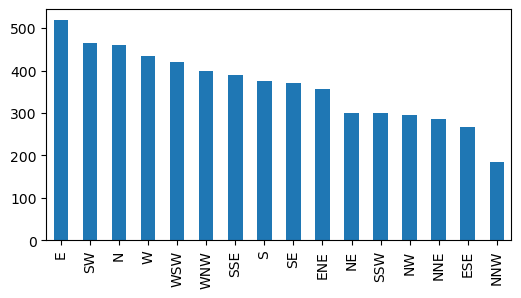

In [159]:
plt.figure(figsize=(6, 3))
object_columns['WindGustDir'].value_counts().plot.bar()

<AxesSubplot:>

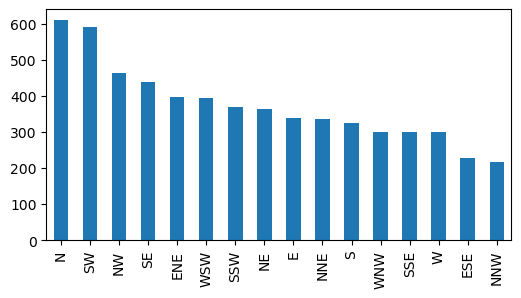

In [160]:
plt.figure(figsize=(6, 3))
object_columns['WindDir9am'].value_counts().plot.bar()

<AxesSubplot:>

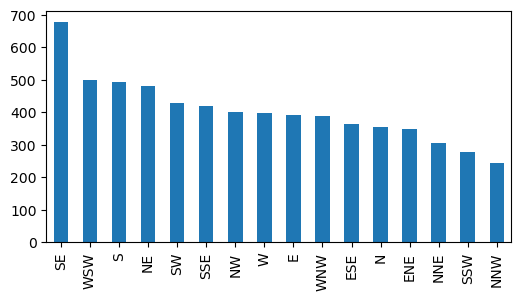

In [161]:
plt.figure(figsize=(6, 3))
object_columns['WindDir3pm'].value_counts().plot.bar()

<AxesSubplot:>

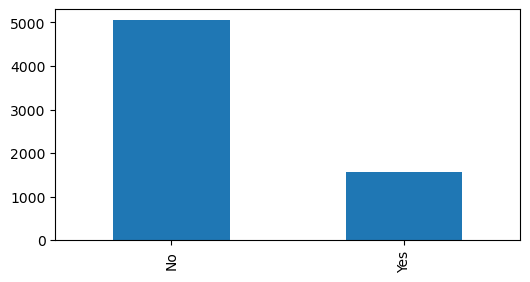

In [163]:
plt.figure(figsize=(6, 3))
object_columns['RainToday'].value_counts().plot.bar()

#### Imputation columns with Object Datatype

In [164]:
from sklearn.impute import SimpleImputer
mode_imp=SimpleImputer (strategy='most_frequent')

In [165]:
for column in object_columns:
    df[column] = mode_imp.fit_transform(df[[column]])

In [167]:
x = df.drop(columns = ['RainTomorrow'])
object_columns_2 = x.select_dtypes(include=['object'])
object_columns_2.isnull().sum()

WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
dtype: int64

#### Analysing columns with Float Datatype

In [168]:
float_columns = x.select_dtypes(include=['float64'])
float_columns.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm'],
      dtype='object')

In [169]:
float_columns.isnull().sum()

MinTemp            70
MaxTemp            57
Rainfall          138
WindGustSpeed     942
WindSpeed9am       63
WindSpeed3pm      100
Humidity9am        54
Humidity3pm        96
Pressure9am      1308
Pressure3pm      1311
Cloud9am         1866
Cloud3pm         1902
Temp9am            51
Temp3pm            92
dtype: int64

In [170]:
for columns in float_columns.columns:
    counts = float_columns[columns].isnull().mean()
    print(f'Columns: {columns}%')
    print(f'Null values: {counts}%')
    print('\n')

Columns: MinTemp%
Null values: 0.010351966873706004%


Columns: MaxTemp%
Null values: 0.008429458740017746%


Columns: Rainfall%
Null values: 0.02040816326530612%


Columns: WindGustSpeed%
Null values: 0.13930789707187222%


Columns: WindSpeed9am%
Null values: 0.009316770186335404%


Columns: WindSpeed3pm%
Null values: 0.014788524105294291%


Columns: Humidity9am%
Null values: 0.007985803016858917%


Columns: Humidity3pm%
Null values: 0.01419698314108252%


Columns: Pressure9am%
Null values: 0.19343389529724933%


Columns: Pressure3pm%
Null values: 0.19387755102040816%


Columns: Cloud9am%
Null values: 0.2759538598047915%


Columns: Cloud3pm%
Null values: 0.28127772848269744%


Columns: Temp9am%
Null values: 0.0075421472937000885%


Columns: Temp3pm%
Null values: 0.013605442176870748%




#### Imputation columns with Float Datatype

In [171]:
imputer = SimpleImputer(strategy='mean')

In [172]:
for column in float_columns:
    imputer.fit(df[[column]])
    df[column] = imputer.transform(df[[column]])

In [173]:
float_columns_2 = df.select_dtypes(include=['float64'])
float_columns_2.isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

#### Dropping Records where Target variable has Null values

In [174]:
df.isnull().sum().sum()

138

In [175]:
df.dropna(inplace=True)

In [176]:
df.isnull().sum().sum()

0

In [177]:
df.shape

(6624, 19)

# 

# 

### Encoding

In [183]:
df['RainToday'].value_counts()

No     5071
Yes    1553
Name: RainToday, dtype: int64

In [184]:
df['RainToday']=df['RainToday'].replace('Yes', 1)
df['RainToday']=df['RainToday'].replace('No', 0)

In [185]:
df['RainToday'].value_counts()

0    5071
1    1553
Name: RainToday, dtype: int64

In [186]:
df['RainTomorrow'].value_counts()

0    5052
1    1572
Name: RainTomorrow, dtype: int64

In [187]:
df['RainTomorrow']=df['RainTomorrow'].replace('Yes', 1)
df['RainTomorrow']=df['RainTomorrow'].replace('No', 0)

In [188]:
df['RainToday'].value_counts()

0    5071
1    1553
Name: RainToday, dtype: int64

In [189]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [190]:
encode_columns = df.select_dtypes(include=['object'])
for column in encode_columns:
    df[column] = le.fit_transform(df[column])

In [191]:
df.head()

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.320988,16.9,21.8,0,0
1,7.4,25.1,0.0,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,4.336806,4.320988,17.2,24.3,0,0
2,12.9,25.7,0.0,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,4.336806,2.000000,21.0,23.2,0,0
3,9.2,28.0,0.0,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,4.336806,4.320988,18.1,26.5,0,0
4,17.5,32.3,1.0,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0,0


# 

# 

### Removing Outliners

In [192]:
df.describe(include='all')

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
count,6624.000000,6624.000000,6624.000000,6624.000000,6624.000000,6624.000000,6624.000000,6624.000000,6624.000000,6624.000000,6624.000000,6624.000000,6624.000000,6624.000000,6624.000000,6624.000000,6624.000000,6624.000000,6624.000000
mean,13.076724,24.087310,2.771224,6.615187,38.880543,7.005888,7.838466,12.732925,17.527688,67.450297,50.410684,1017.664427,1015.154988,4.316205,4.309192,17.884030,22.702182,0.234450,0.237319
std,5.557813,6.128234,10.546434,5.234269,13.354768,4.549039,4.490989,9.777009,9.566006,17.207588,18.512734,6.025896,5.962299,2.485125,2.330797,5.729483,5.967396,0.423687,0.425471
min,-2.000000,8.200000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000,0.000000,0.000000
25%,9.000000,19.575000,0.000000,1.000000,30.000000,3.000000,4.000000,6.000000,9.000000,56.000000,38.000000,1014.300000,1011.600000,2.000000,2.000000,13.800000,18.400000,0.000000,0.000000
50%,13.109145,23.500000,0.000000,7.000000,38.977663,7.000000,8.000000,11.000000,17.000000,68.000000,50.000000,1017.626311,1015.119923,4.336806,4.320988,17.900000,22.200000,0.000000,0.000000
75%,17.400000,28.400000,1.000000,12.000000,46.000000,11.000000,12.000000,19.000000,24.000000,80.000000,62.000000,1020.900000,1018.400000,7.000000,6.000000,22.200000,26.800000,0.000000,0.000000
max,28.500000,45.500000,371.000000,15.000000,107.000000,15.000000,15.000000,61.000000,83.000000,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000,1.000000,1.000000


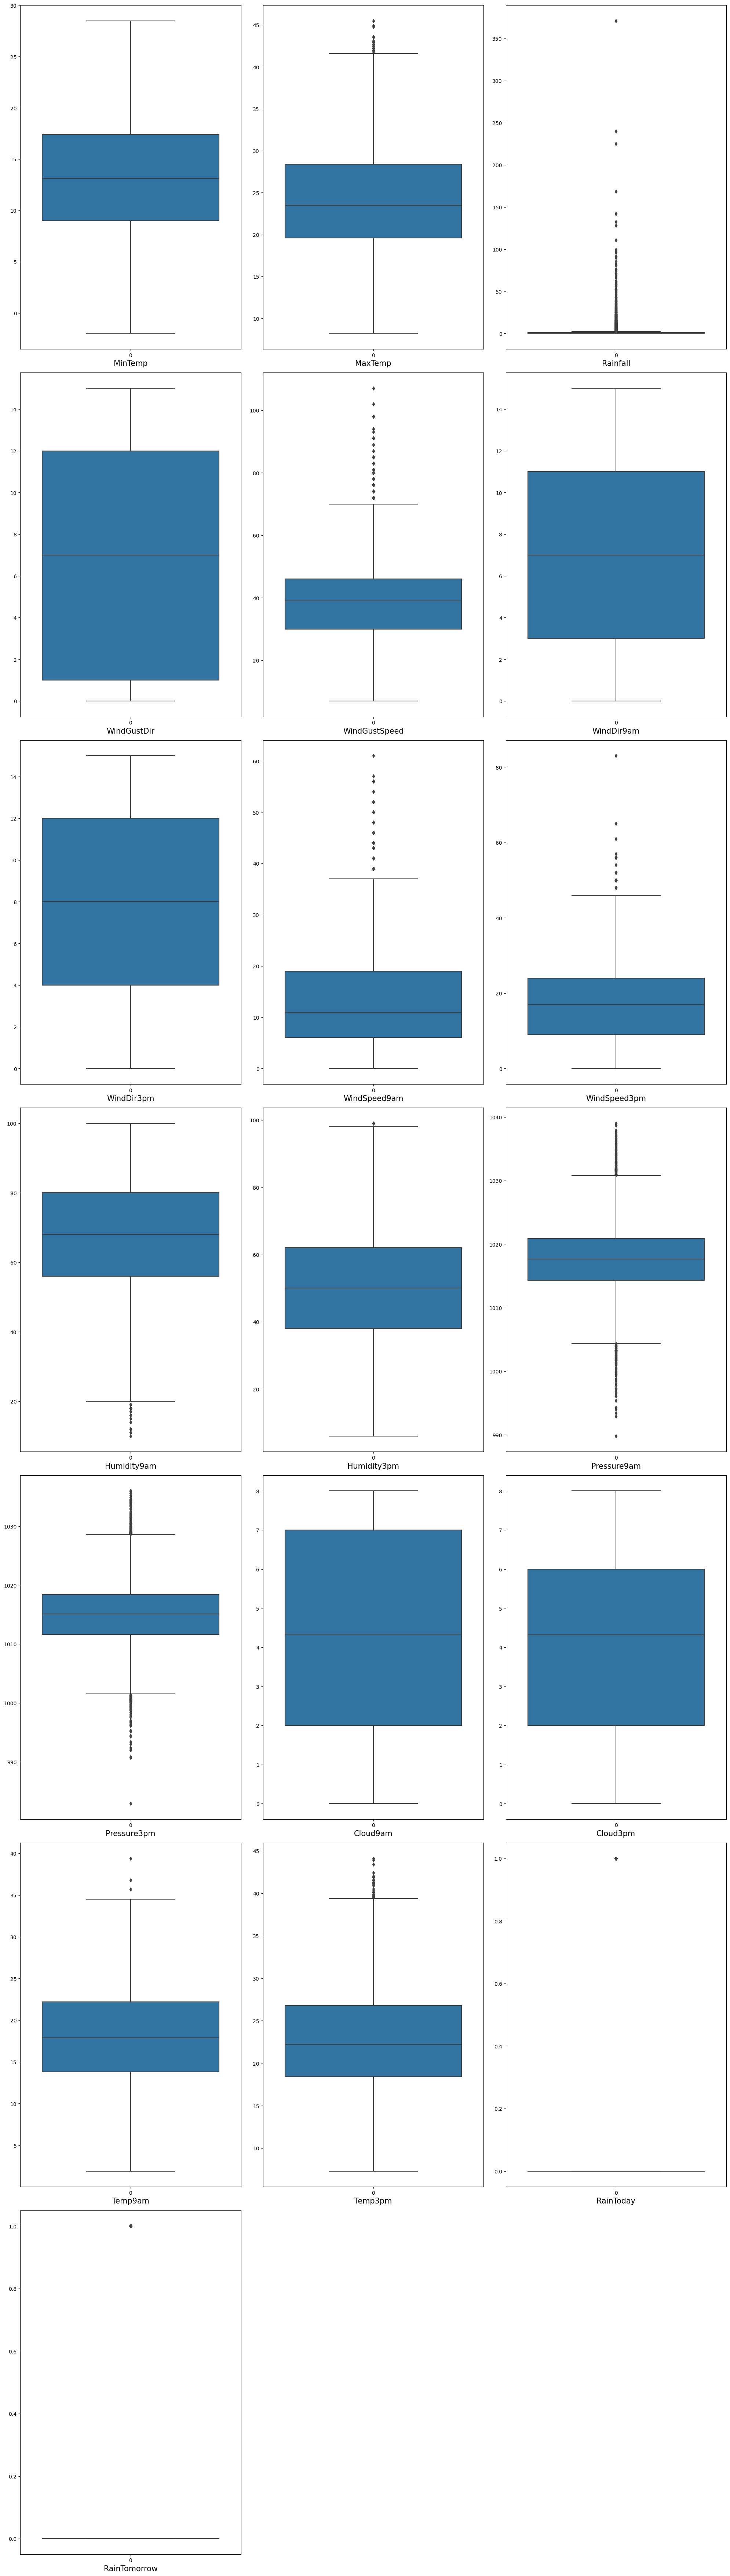

In [193]:
plt.figure(figsize=(20, 120))
graph = 1

for column in df.columns:
    if graph <= 32:
        plt.subplot(12, 3, graph)
        sns.boxplot(data=df[column])
        plt.xlabel(column, fontsize=15)
    graph += 1

plt.tight_layout()
plt.show()

#### Removing column having huge number of Outliners

In [194]:
Rainfall = df[df['Rainfall']>1]
Rainfall.shape

(1619, 19)

In [195]:
df.drop(['Rainfall'], axis=1,inplace=True)
df.shape

(6624, 18)

In [196]:
df.describe()

,MinTemp,MaxTemp,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
count,6624.000000,6624.000000,6624.000000,6624.000000,6624.000000,6624.000000,6624.000000,6624.000000,6624.000000,6624.000000,6624.000000,6624.000000,6624.000000,6624.000000,6624.000000,6624.000000,6624.000000,6624.000000
mean,13.076724,24.087310,6.615187,38.880543,7.005888,7.838466,12.732925,17.527688,67.450297,50.410684,1017.664427,1015.154988,4.316205,4.309192,17.884030,22.702182,0.234450,0.237319
std,5.557813,6.128234,5.234269,13.354768,4.549039,4.490989,9.777009,9.566006,17.207588,18.512734,6.025896,5.962299,2.485125,2.330797,5.729483,5.967396,0.423687,0.425471
min,-2.000000,8.200000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000,0.000000,0.000000
25%,9.000000,19.575000,1.000000,30.000000,3.000000,4.000000,6.000000,9.000000,56.000000,38.000000,1014.300000,1011.600000,2.000000,2.000000,13.800000,18.400000,0.000000,0.000000
50%,13.109145,23.500000,7.000000,38.977663,7.000000,8.000000,11.000000,17.000000,68.000000,50.000000,1017.626311,1015.119923,4.336806,4.320988,17.900000,22.200000,0.000000,0.000000
75%,17.400000,28.400000,12.000000,46.000000,11.000000,12.000000,19.000000,24.000000,80.000000,62.000000,1020.900000,1018.400000,7.000000,6.000000,22.200000,26.800000,0.000000,0.000000
max,28.500000,45.500000,15.000000,107.000000,15.000000,15.000000,61.000000,83.000000,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000,1.000000,1.000000


#### Removing Records holding Outliners

In [197]:
df.columns

Index(['MinTemp', 'MaxTemp', 'WindGustDir', 'WindGustSpeed', 'WindDir9am',
       'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [198]:
from scipy.stats import zscore 

z_score = zscore (df[['WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Temp9am', 'Temp3pm']])
abs_z_score = np.abs(z_score) 

filtering_entry = (abs_z_score < 2.7).all(axis=1)
df = df[filtering_entry]

df.describe()

,MinTemp,MaxTemp,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
count,6367.000000,6367.000000,6367.000000,6367.000000,6367.000000,6367.000000,6367.000000,6367.00000,6367.000000,6367.000000,6367.000000,6367.000000,6367.000000,6367.000000,6367.000000,6367.000000,6367.000000,6367.000000
mean,13.004524,23.987992,6.633579,37.806089,7.049317,7.838542,12.089139,16.92656,67.855860,50.705969,1017.864415,1015.353193,4.308818,4.294130,17.806348,22.622876,0.235433,0.232606
std,5.531131,5.934591,5.240076,11.919834,4.547831,4.486199,8.860464,8.85084,17.034254,18.260025,5.891085,5.834636,2.490032,2.331958,5.658171,5.770263,0.424302,0.422526
min,-1.700000,8.400000,0.000000,7.000000,0.000000,0.000000,0.000000,0.00000,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,2.500000,7.300000,0.000000,0.000000
25%,8.900000,19.600000,1.000000,30.000000,3.000000,4.000000,6.000000,9.00000,56.000000,38.000000,1014.600000,1011.900000,2.000000,2.000000,13.800000,18.400000,0.000000,0.000000
50%,13.100000,23.500000,7.000000,38.977663,7.000000,9.000000,11.000000,17.00000,68.000000,50.467147,1017.626311,1015.119923,4.336806,4.320988,17.895038,22.200000,0.000000,0.000000
75%,17.300000,28.200000,12.000000,44.000000,11.000000,12.000000,19.000000,24.00000,81.000000,62.000000,1021.100000,1018.600000,7.000000,6.000000,22.000000,26.600000,0.000000,0.000000
max,27.800000,41.800000,15.000000,74.000000,15.000000,15.000000,39.000000,43.00000,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,32.800000,38.800000,1.000000,1.000000


In [199]:
df.shape

(6367, 18)

# 

# 

### Removing Skewness

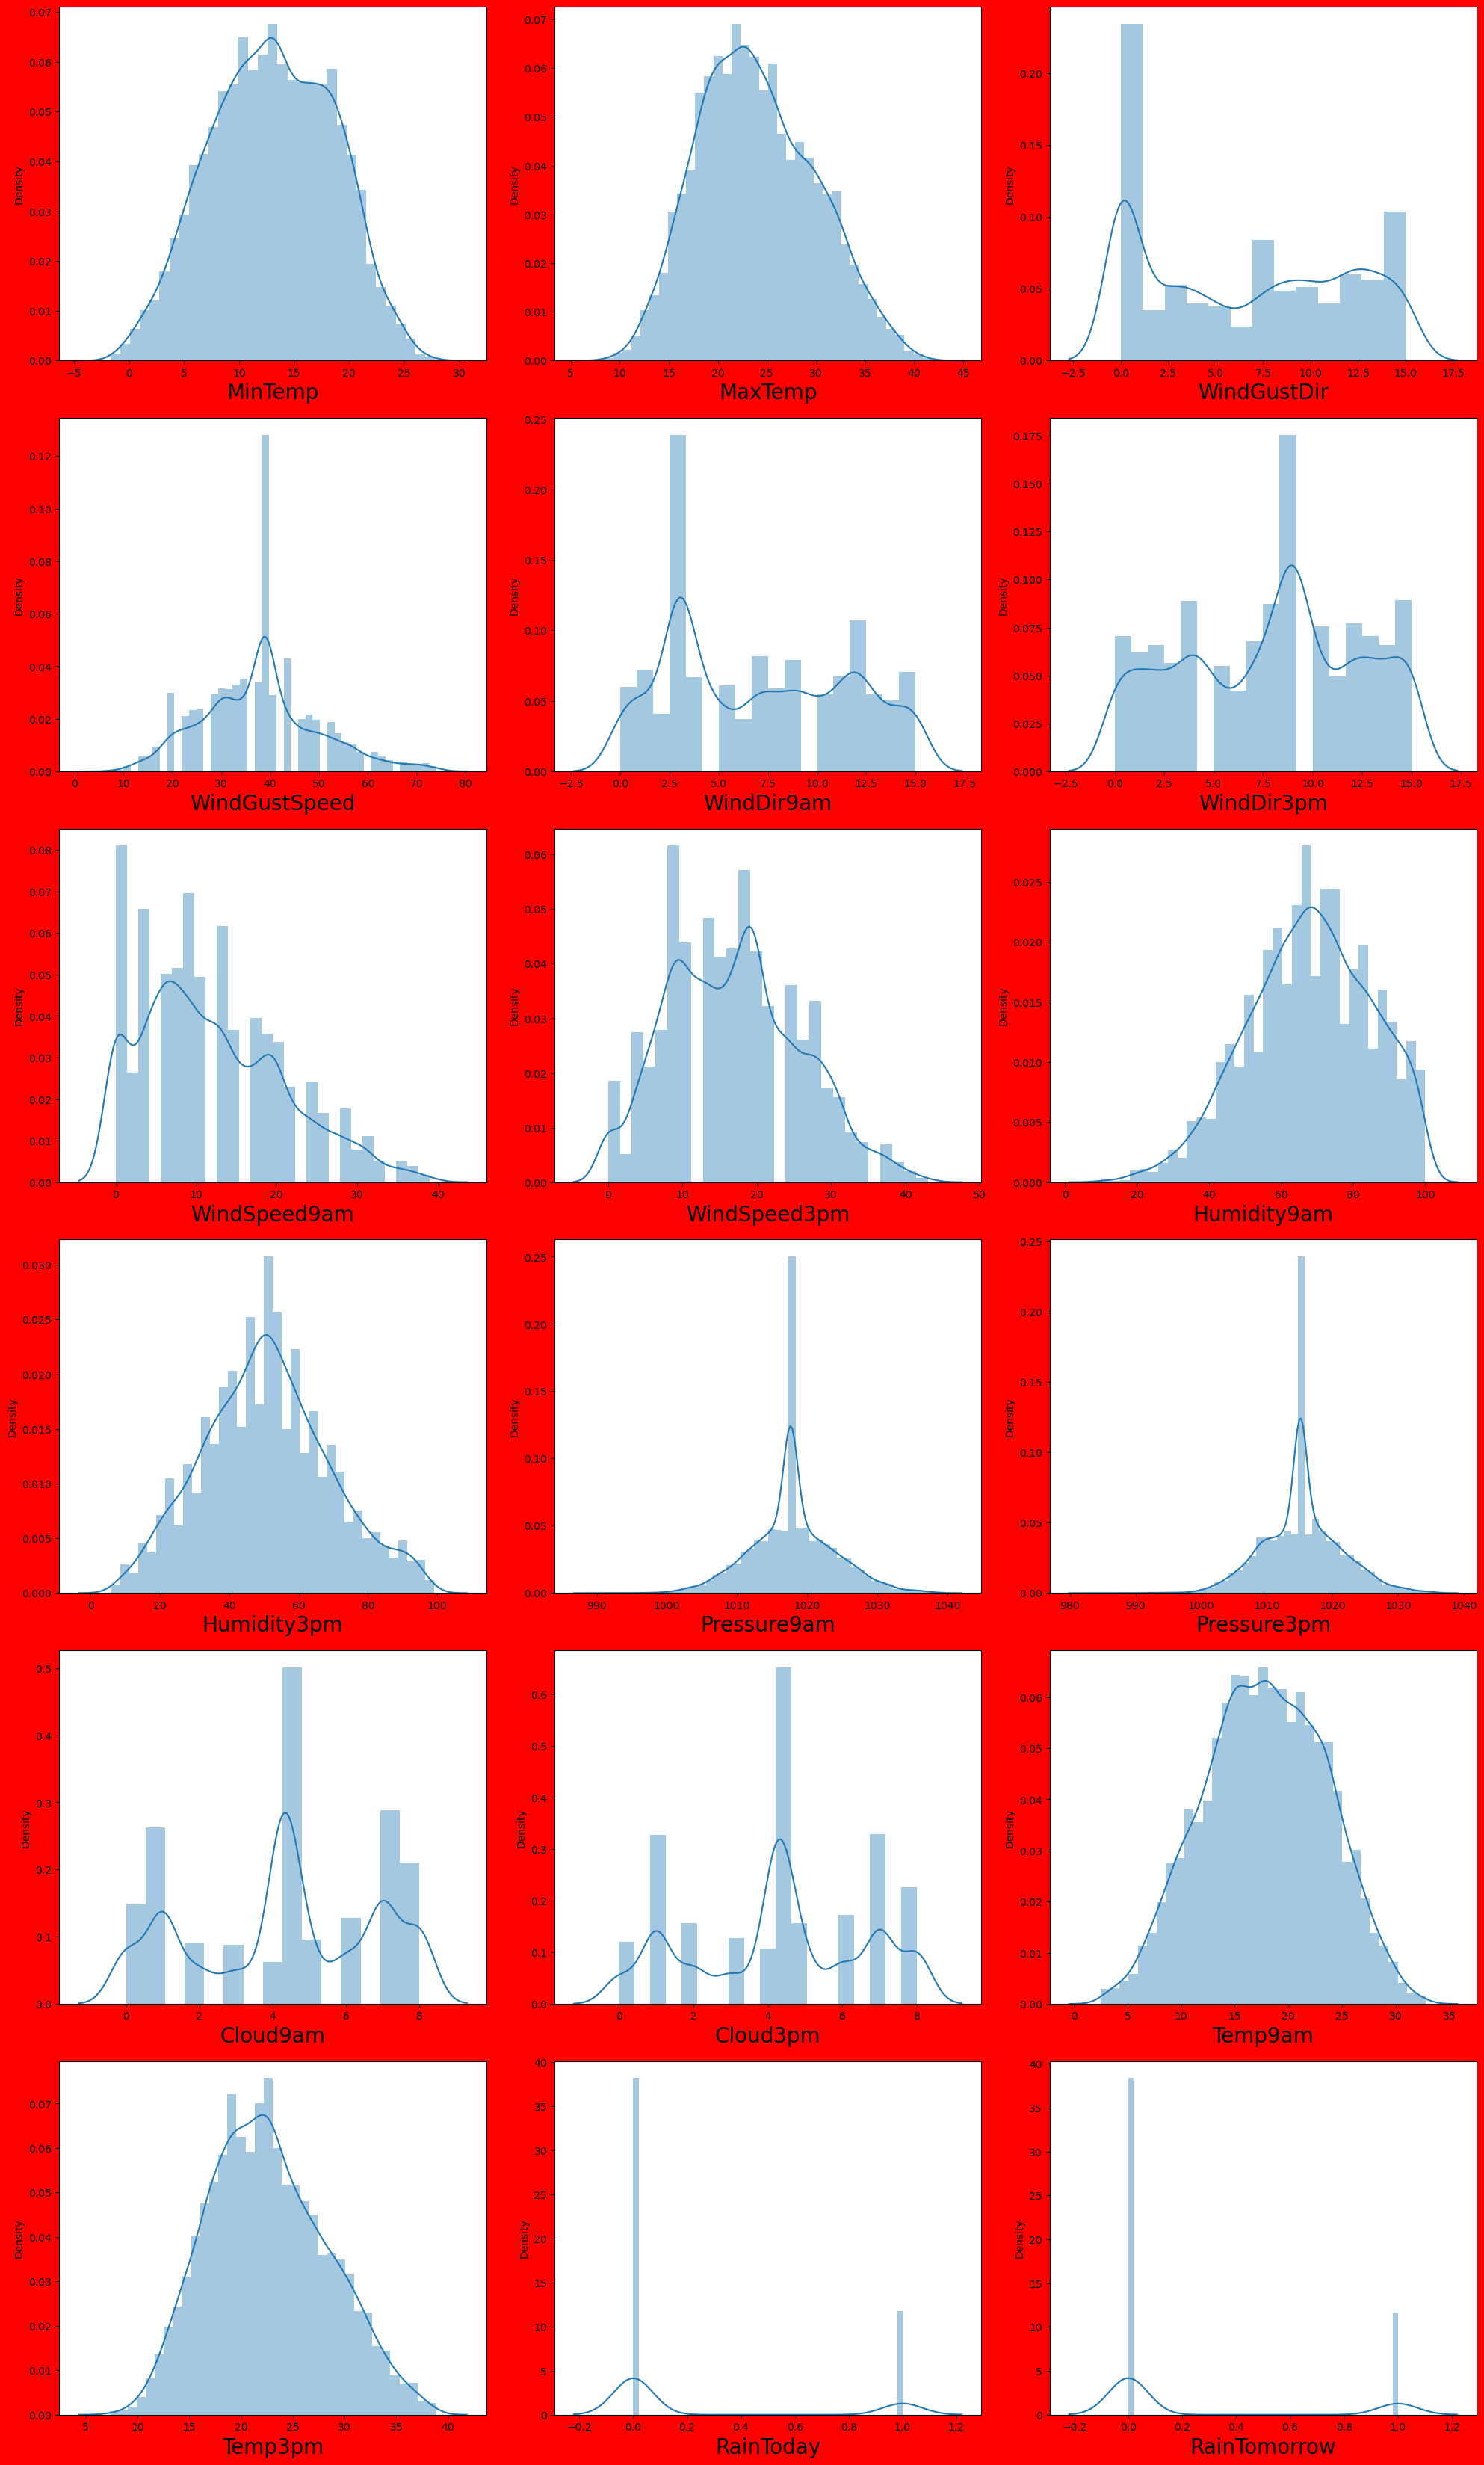

In [200]:
plt.figure(figsize=(20,60), facecolor='red')
plotnumber = 1

for column in df:                       
    if plotnumber<=32:                    
        ax = plt.subplot(11,3,plotnumber)    
        sns.distplot(df[column])       
        plt.xlabel(column, fontsize=20)   

    plotnumber+=1  
plt.tight_layout()  

In [201]:
df.skew()

MinTemp         -0.065192
MaxTemp          0.253626
WindGustDir      0.093390
WindGustSpeed    0.392540
WindDir9am       0.199478
WindDir3pm      -0.128507
WindSpeed9am     0.621504
WindSpeed3pm     0.273099
Humidity9am     -0.266782
Humidity3pm      0.170759
Pressure9am      0.092836
Pressure3pm      0.110357
Cloud9am        -0.200538
Cloud3pm        -0.147728
Temp9am         -0.058570
Temp3pm          0.266730
RainToday        1.247462
RainTomorrow     1.266092
dtype: float64

In [202]:
df.columns

Index(['MinTemp', 'MaxTemp', 'WindGustDir', 'WindGustSpeed', 'WindDir9am',
       'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

# 

# 

### Choosing only Best Features

In [203]:
from sklearn.feature_selection import SelectKBest, f_classif

In [205]:
x = df.drop(columns = ['RainTomorrow'])
y = df['RainTomorrow']

In [206]:
best_features = SelectKBest(score_func=f_classif, k=15)

fit = best_features.fit(x,y)

df_scores = pd.DataFrame(fit.scores_) 
df_columns = pd.DataFrame(x.columns) 

feature_scores = pd.concat([df_columns, df_scores], axis=1)

feature_scores.columns = ['Feature_Name', 'Score']
print(feature_scores.nlargest(9, 'Score'))

     Feature_Name        Score
9     Humidity3pm  1905.488319
13       Cloud3pm   976.212039
16      RainToday   735.526915
12       Cloud9am   643.898900
8     Humidity9am   621.729936
15        Temp3pm   279.437170
3   WindGustSpeed   203.065219
1         MaxTemp   170.557564
10    Pressure9am   160.315788


In [207]:
df=df[['Humidity9am', 'Humidity3pm', 'RainTomorrow', 'Cloud9am', 'Cloud3pm', 'Temp3pm', 'MaxTemp', 'WindDir9am', 'RainToday']]
df.head()

,Humidity9am,Humidity3pm,RainTomorrow,Cloud9am,Cloud3pm,Temp3pm,MaxTemp,WindDir9am,RainToday
0,71.0,22.0,0,8.000000,4.320988,21.8,22.9,13,0
1,44.0,25.0,0,4.336806,4.320988,24.3,25.1,6,0
2,38.0,30.0,0,4.336806,2.000000,23.2,25.7,13,0
3,45.0,16.0,0,4.336806,4.320988,26.5,28.0,9,0
4,82.0,33.0,0,7.000000,8.000000,29.7,32.3,1,0


In [208]:
df.shape

(6367, 9)

# 

# 

### Removing Multicolinearity

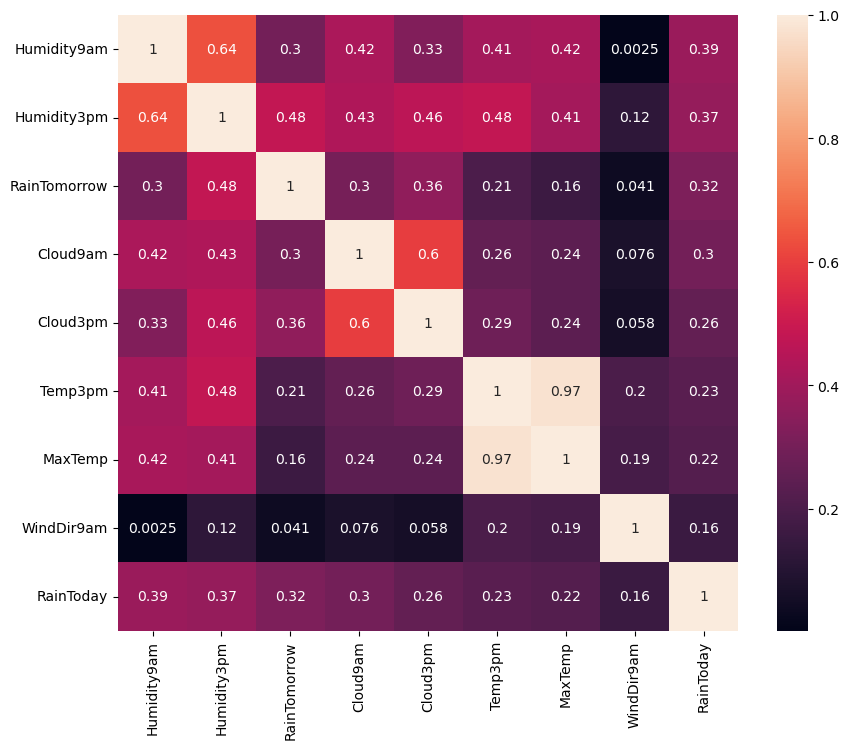

In [209]:
import matplotlib.pyplot as plt
import seaborn as sns

df_corr = df.corr().abs ()

plt.figure(figsize=(10, 8))
sns.heatmap(df_corr, annot=True, annot_kws={'size': 10})
plt.show()

In [210]:
df.columns

Index(['Humidity9am', 'Humidity3pm', 'RainTomorrow', 'Cloud9am', 'Cloud3pm',
       'Temp3pm', 'MaxTemp', 'WindDir9am', 'RainToday'],
      dtype='object')

In [211]:
df.drop(['Humidity3pm','Cloud3pm','MaxTemp'], axis=1,inplace=True)
df.head()

,Humidity9am,RainTomorrow,Cloud9am,Temp3pm,WindDir9am,RainToday
0,71.0,0,8.000000,21.8,13,0
1,44.0,0,4.336806,24.3,6,0
2,38.0,0,4.336806,23.2,13,0
3,45.0,0,4.336806,26.5,9,0
4,82.0,0,7.000000,29.7,1,0


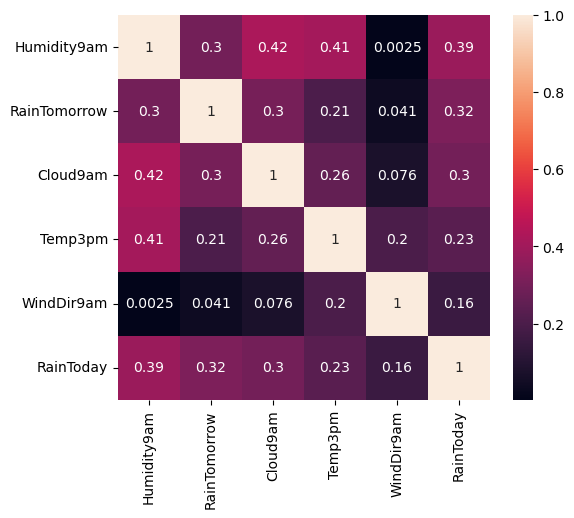

In [212]:
import matplotlib.pyplot as plt
import seaborn as sns

df_corr = df.corr().abs ()

plt.figure(figsize=(6, 5))
sns.heatmap(df_corr, annot=True, annot_kws={'size' :10})
plt.show()

# 

# 

### Oversampling

In [213]:
value_counts = df['RainTomorrow'].value_counts()
print(value_counts)

0    4886
1    1481
Name: RainTomorrow, dtype: int64


In [214]:
x = df.drop(columns = ['RainTomorrow'])
y = df['RainTomorrow']

In [215]:
from imblearn.over_sampling import SMOTE
upsample = SMOTE()

In [216]:
x, y = upsample.fit_resample(x,y)

In [217]:
from collections import Counter
count = Counter(y)
print(count)

Counter({0: 4886, 1: 4886})


### 

### Standardization

In [218]:
from sklearn.preprocessing import StandardScaler

In [219]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

### 

### Train-Test split

In [220]:
from sklearn.model_selection import train_test_split

In [221]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled, y, test_size = 0.25, random_state=12)

### 

### Importing important Metrices

In [222]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
from sklearn.model_selection import GridSearchCV

### 

# 

### BaggingClassifier with DecisionTreeClassifier

In [71]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

In [72]:
bag_dtc = BaggingClassifier(DecisionTreeClassifier(criterion='gini',max_features=None, min_samples_leaf=2, min_samples_split=10,max_depth=10))

In [73]:
bag_dtc.fit(x_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=10,
                                                        min_samples_leaf=2,
                                                        min_samples_split=10))

In [74]:
print('Accuracy Score:',bag_dtc.score(x_train, y_train))

Accuracy Score: 0.887757909215956


In [75]:
y_pred = bag_dtc.predict(x_test)

In [76]:
print('Accuracy Score:',accuracy_score (y_test,y_pred))

Accuracy Score: 0.8267326732673267


In [77]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[ 995,  171],
       [ 249, 1009]], dtype=int64)

In [78]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.85      0.83      1166
           1       0.86      0.80      0.83      1258

    accuracy                           0.83      2424
   macro avg       0.83      0.83      0.83      2424
weighted avg       0.83      0.83      0.83      2424



In [79]:
roc_auc = roc_auc_score(y_test,y_pred)
roc_auc

0.827705770547058

### Cross-validation on BaggingClassifier with DecisionTreeClassifier

In [80]:
from sklearn.model_selection import KFold, cross_val_score

In [81]:
c7 = cross_val_score (bag_dtc, x_train, y_train, cv=5)
c7

array([0.80605227, 0.81224209, 0.81774415, 0.83081155, 0.81361761])

In [82]:
c7.mean()

0.8160935350756533

In [83]:
c8 = cross_val_score (bag_dtc, x_test, y_test, cv=5)
c8

array([0.78762887, 0.80206186, 0.75463918, 0.77113402, 0.75413223])

In [84]:
c8.mean()

0.7739192297861464

# 

### Random Forest Classifier

In [85]:
from sklearn.ensemble import RandomForestClassifier

In [86]:
rf = RandomForestClassifier()
param_grid = {'n_estimators': [25, 50, 100, 150],
              'max_features': ['sqrt', 'log2', None],
              'max_depth': [3, 6, 9],
              'max_leaf_nodes': [3, 6, 9]
             }
gridsearch = GridSearchCV(estimator=rf, param_grid=param_grid)
gridsearch.fit(x_train, y_train)
gridsearch.best_params_

{'max_depth': 9,
 'max_features': 'sqrt',
 'max_leaf_nodes': 9,
 'n_estimators': 50}

In [87]:
cls_rf = RandomForestClassifier(n_estimators=160,criterion='gini',min_samples_split=3,max_depth=16)

In [88]:
cls_rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=16, min_samples_split=3, n_estimators=160)

In [89]:
print('Accuracy Score:',cls_rf.score(x_train, y_train))

Accuracy Score: 0.9898211829436039


In [90]:
y_pred = cls_rf.predict(x_test)

In [91]:
print('Accuracy Score:',accuracy_score (y_test,y_pred))

Accuracy Score: 0.8477722772277227


In [92]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[1000,  166],
       [ 203, 1055]], dtype=int64)

In [93]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84      1166
           1       0.86      0.84      0.85      1258

    accuracy                           0.85      2424
   macro avg       0.85      0.85      0.85      2424
weighted avg       0.85      0.85      0.85      2424



In [94]:
roc_auc = roc_auc_score(y_test,y_pred)
roc_auc

0.8481328417510438

### Cross-validation with Random Forest Classifier

In [95]:
c9 = cross_val_score (cls_rf, x_train, y_train, cv=5)
c9

array([0.84731774, 0.84731774, 0.85213205, 0.86244842, 0.84869326])

In [96]:
c9.mean()

0.8515818431911967

In [97]:
c10 = cross_val_score (cls_rf, x_test, y_test, cv=5)
c10

array([0.82061856, 0.81649485, 0.78350515, 0.80206186, 0.75826446])

In [98]:
c10.mean()

0.7961889750362102

# 

### BaggingClassifier with RandomForestClassifier

In [99]:
bag_rfc = BaggingClassifier(RandomForestClassifier(n_estimators=160,criterion='gini',min_samples_split=3,max_depth=16))

In [100]:
bag_rfc.fit(x_train, y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(max_depth=16,
                                                        min_samples_split=3,
                                                        n_estimators=160))

In [101]:
print('Accuracy Score:',bag_rfc.score(x_train, y_train))

Accuracy Score: 0.9562585969738652


In [102]:
y_pred = bag_rfc.predict(x_test)

In [103]:
print('Accuracy Score:',accuracy_score (y_test,y_pred))

Accuracy Score: 0.8378712871287128


In [104]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[ 991,  175],
       [ 218, 1040]], dtype=int64)

In [105]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.85      0.83      1166
           1       0.86      0.83      0.84      1258

    accuracy                           0.84      2424
   macro avg       0.84      0.84      0.84      2424
weighted avg       0.84      0.84      0.84      2424



In [106]:
roc_auc = roc_auc_score(y_test,y_pred)
roc_auc

0.8383116493549346

### Cross-validation on BaggingClassifier with RandomForestClassifier

In [107]:
c11 = cross_val_score (bag_rfc, x_train, y_train, cv=5)
c11

array([0.84044017, 0.83218707, 0.83562586, 0.85694635, 0.83287483])

In [108]:
c11.mean()

0.8396148555708391

In [109]:
c12 = cross_val_score (bag_rfc, x_test, y_test, cv=5)
c12

array([0.82061856, 0.82474227, 0.77319588, 0.77731959, 0.77066116])

In [110]:
c12.mean()

0.7933074891369174

# 

### GradientBoostingClassifier

In [111]:
from sklearn.ensemble import GradientBoostingClassifier

In [112]:
cls_gb = GradientBoostingClassifier(n_estimators=17,learning_rate=1,max_depth=3)

In [113]:
cls_gb.fit(x_train, y_train)

GradientBoostingClassifier(learning_rate=1, n_estimators=17)

In [114]:
print('Accuracy Score:',cls_gb.score(x_train, y_train))

Accuracy Score: 0.8418156808803301


In [115]:
y_pred = cls_gb.predict(x_test)

In [116]:
print('Accuracy Score:',accuracy_score (y_test,y_pred))

Accuracy Score: 0.8164191419141914


In [117]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[1009,  157],
       [ 288,  970]], dtype=int64)

In [118]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.87      0.82      1166
           1       0.86      0.77      0.81      1258

    accuracy                           0.82      2424
   macro avg       0.82      0.82      0.82      2424
weighted avg       0.82      0.82      0.82      2424



In [119]:
roc_auc = roc_auc_score(y_test,y_pred)
roc_auc

0.8182084061662309

### Cross-validation with GradientBoostingClassifier

In [120]:
c17 = cross_val_score (cls_gb, x_train, y_train, cv=5)
c17

array([0.8088033 , 0.80605227, 0.82530949, 0.83906465, 0.80811554])

In [121]:
c17.mean()

0.8174690508940854

In [122]:
c18 = cross_val_score (cls_gb, x_test, y_test, cv=5)
c18

array([0.76701031, 0.83917526, 0.76907216, 0.80618557, 0.78512397])

In [123]:
c18.mean()

0.7933134531822443

# 

### BaggingClassifier on GradientBoostingClassifier

In [124]:
bag_gbc = BaggingClassifier(GradientBoostingClassifier(n_estimators=17,learning_rate=1,max_depth=3))

In [125]:
bag_gbc.fit(x_train, y_train)

BaggingClassifier(base_estimator=GradientBoostingClassifier(learning_rate=1,
                                                            n_estimators=17))

In [126]:
print('Accuracy Score:',bag_gbc.score(x_train, y_train))

Accuracy Score: 0.8477303988995873


In [127]:
y_pred = bag_gbc.predict(x_test)

In [128]:
print('Accuracy Score:',accuracy_score (y_test,y_pred))

Accuracy Score: 0.8263201320132013


In [129]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[1021,  145],
       [ 276,  982]], dtype=int64)

In [130]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83      1166
           1       0.87      0.78      0.82      1258

    accuracy                           0.83      2424
   macro avg       0.83      0.83      0.83      2424
weighted avg       0.83      0.83      0.83      2424



In [131]:
roc_auc = roc_auc_score(y_test,y_pred)
roc_auc

0.8281236791225692

### Cross-validation on BaggingClassifier with GradientBoostingClassifier

In [132]:
c17 = cross_val_score (bag_gbc, x_train, y_train, cv=5)
c17

array([0.81911967, 0.82462173, 0.84181568, 0.84181568, 0.81911967])

In [133]:
c17.mean()

0.8292984869325999

In [134]:
c18 = cross_val_score (bag_gbc, x_test, y_test, cv=5)
c18

array([0.82268041, 0.84329897, 0.7814433 , 0.79587629, 0.78719008])

In [135]:
c18.mean()

0.8060978103433586

# 

# 

### Plotting ROC Curve for all models

In [136]:
from sklearn.metrics import plot_roc_curve

#### On Training Data

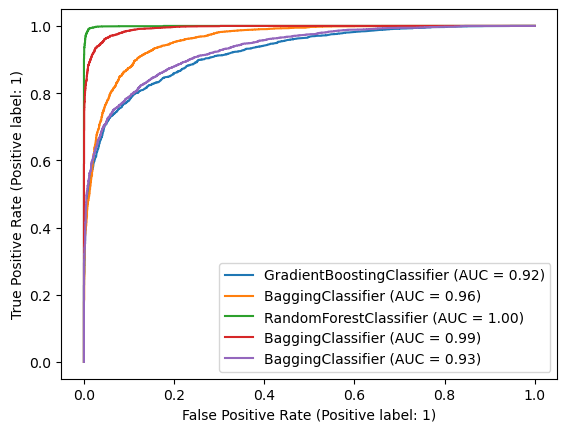

In [137]:
disp = plot_roc_curve (cls_gb, x_train, y_train)

plot_roc_curve (bag_dtc, x_train, y_train, ax=disp.ax_)
plot_roc_curve (cls_rf, x_train, y_train, ax=disp.ax_)
plot_roc_curve (bag_rfc, x_train, y_train, ax=disp.ax_)
plot_roc_curve (bag_gbc, x_train, y_train, ax=disp.ax_)

plt.legend (prop={'size' :10}, loc= 'lower right')
                  
plt.show()

#### On Testing Data

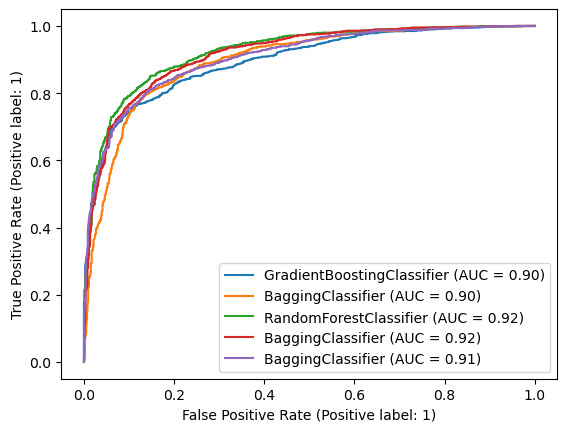

In [138]:
disp = plot_roc_curve (cls_gb, x_test, y_test)

plot_roc_curve (bag_dtc, x_test, y_test, ax=disp.ax_)
plot_roc_curve (cls_rf, x_test, y_test, ax=disp.ax_)
plot_roc_curve (bag_rfc, x_test, y_test, ax=disp.ax_)
plot_roc_curve (bag_gbc, x_test, y_test, ax=disp.ax_)

plt.legend (prop={'size' :10}, loc= 'lower right')
                  
plt.show()

# 

### Saving the Best Model

In [139]:
import pickle 

In [140]:
with open('bag_dtc', 'wb') as f: 
    pickle.dump(bag_dtc, f)

In [141]:
with open('bag_gbc', 'wb') as f: 
    pickle.dump(bag_gbc, f)

# 

# 